In [4]:
import pandas as pd
import numpy as np

# Define a function to create synthetic data (or load your actual data)
def create_synthetic_data():
    np.random.seed(42)
    data = {
        'Al': np.random.uniform(99.4, 99.7, 200),
        'Si': np.random.uniform(0.1, 0.3, 200),
        'Fe': np.random.uniform(0.1, 0.4, 200),
        'Casting Temp': np.random.uniform(690, 720, 200),
        'Cooling Water Temp': np.random.uniform(15, 25, 200),
        'Casting Speed': np.random.uniform(1.8, 2.2, 200),
        'Entry Temp': np.random.uniform(500, 550, 200),
        'Emulsion Temp': np.random.uniform(60, 80, 200),
        'Emulsion Pressure': np.random.uniform(2, 4, 200),
        'Quench Water Pressure': np.random.uniform(3, 5, 200),
    }
    df = pd.DataFrame(data)
    # Example formulas for synthetic values
    df['Elongation'] = 15 - 0.4 * (df['Al'] - 99.4) + 0.2 * df['Casting Temp'] - 0.15 * df['Cooling Water Temp'] + 0.1 * df['Casting Speed'] - 0.05 * df['Entry Temp'] + 0.08 * df['Emulsion Temp'] - 0.03 * df['Emulsion Pressure'] + 0.05 * df['Quench Water Pressure']
    df['UTS'] = 150 + 0.5 * (df['Al'] - 99.4) - 0.2 * df['Casting Temp'] + 0.15 * df['Cooling Water Temp'] - 0.1 * df['Casting Speed'] + 0.1 * df['Entry Temp'] - 0.05 * df['Emulsion Temp'] + 0.02 * df['Emulsion Pressure'] - 0.1 * df['Quench Water Pressure']
    df['Conductivity'] = 60 + 0.3 * (df['Al'] - 99.4) - 0.1 * df['Casting Temp'] + 0.05 * df['Cooling Water Temp'] - 0.02 * df['Casting Speed'] + 0.05 * df['Entry Temp'] - 0.03 * df['Emulsion Temp'] + 0.01 * df['Emulsion Pressure'] - 0.05 * df['Quench Water Pressure']
    
    return df

df = create_synthetic_data()


In [5]:
df

Al        Si        Fe  Casting Temp  Cooling Water Temp  \
0    99.512362  0.228406  0.130937    695.068052           22.072386   
1    99.685214  0.116828  0.370766    698.357710           16.525390   
2    99.619598  0.132326  0.251576    695.310315           20.762884   
3    99.579598  0.279711  0.347937    692.661076           21.067150   
4    99.446806  0.221286  0.196015    693.619076           19.241307   
..         ...       ...       ...           ...                 ...   
195  99.504763  0.286151  0.242188    716.163717           15.915821   
196  99.617787  0.271683  0.300267    717.963548           24.173136   
197  99.669133  0.185799  0.151696    706.953996           16.368186   
198  99.666126  0.250174  0.157687    710.899525           24.502374   
199  99.633963  0.250909  0.112261    717.674981           19.460058   

     Casting Speed  Entry Temp  Emulsion Temp  Emulsion Pressure  \
0         1.874053  537.913160      63.340838           2.383735   
1         2.016760  501.229346      63.352384           2.646743   
2         2.149178  501.106178      60.733429           2.453313   
3         2.092890  516.180511      74.728040           2.709993   
4         2.122624  524.432160      73.276091           2.138848   
..             ...         ...            ...                ...   
195       2.148615  541.444168      71.567738           2.169584   
196       2.189396  521.544376      65.483213           3.432647   
197       2.187551  512.435714      61.588387           2.144169   
198       2.099861  530.857249      61.713165           2.142513   
199       1.852034  535.338861      77.883817           2.024217   

     Quench Water Pressure  Elongation        UTS  Conductivity  
0                 4.913003  129.190960  64.346672     16.366662  
1                 4.475017  132.431396  59.308946     13.999340  
2                 3.706503  130.989800  60.699613     14.602523  
3                 3.593071  130.777164  62.084909     15.213902  
4                 3.699406  130.792444  62.425769     15.431490  
..                     ...         ...        ...           ...  
195               4.313910  134.822145  59.170180     13.899052  
196               4.913229  134.402685  58.380821     13.335237  
197               3.137916  133.444529  58.873484     13.798679  
198               3.114109  132.093705  61.150034     14.730194  
199               3.564374  135.288861  58.639532     13.511105  

[200 rows x 13 columns]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

# Define features and targets
features = ['Al', 'Si', 'Fe', 'Casting Temp', 'Cooling Water Temp', 'Casting Speed', 'Entry Temp', 'Emulsion Temp', 'Emulsion Pressure', 'Quench Water Pressure']
X = df[features]
y_UTS = df['UTS']
y_Elongation = df['Elongation']
y_Conductivity = df['Conductivity']

# Split the data
X_train, X_test, y_UTS_train, y_UTS_test = train_test_split(X, y_UTS, test_size=0.2, random_state=42)
X_train, X_test, y_Elongation_train, y_Elongation_test = train_test_split(X, y_Elongation, test_size=0.2, random_state=42)
X_train, X_test, y_Conductivity_train, y_Conductivity_test = train_test_split(X, y_Conductivity, test_size=0.2, random_state=42)

# Train models
model_UTS = LinearRegression().fit(X_train, y_UTS_train)
model_Elongation = LinearRegression().fit(X_train, y_Elongation_train)
model_Conductivity = LinearRegression().fit(X_train, y_Conductivity_train)


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


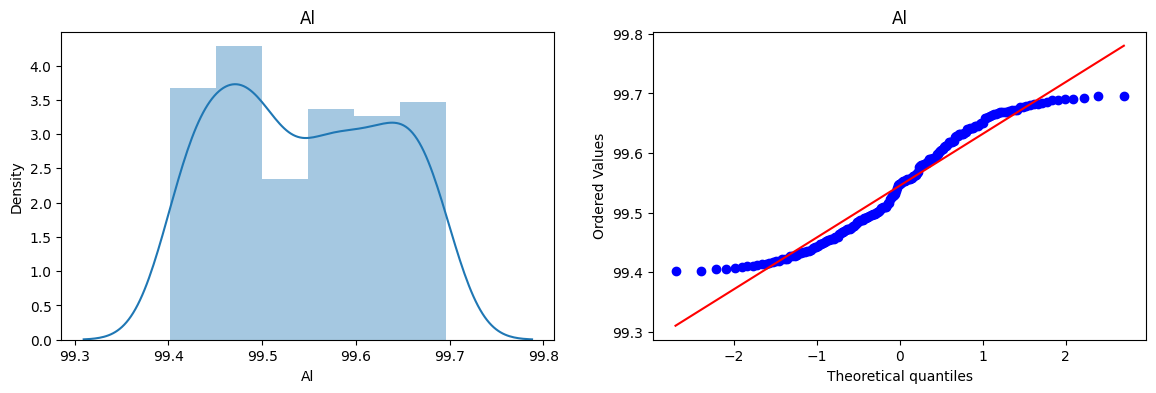

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


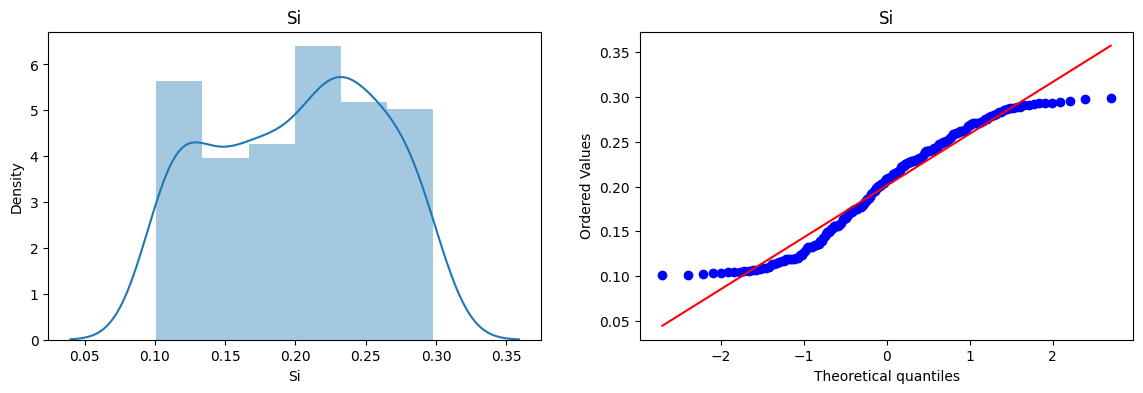

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


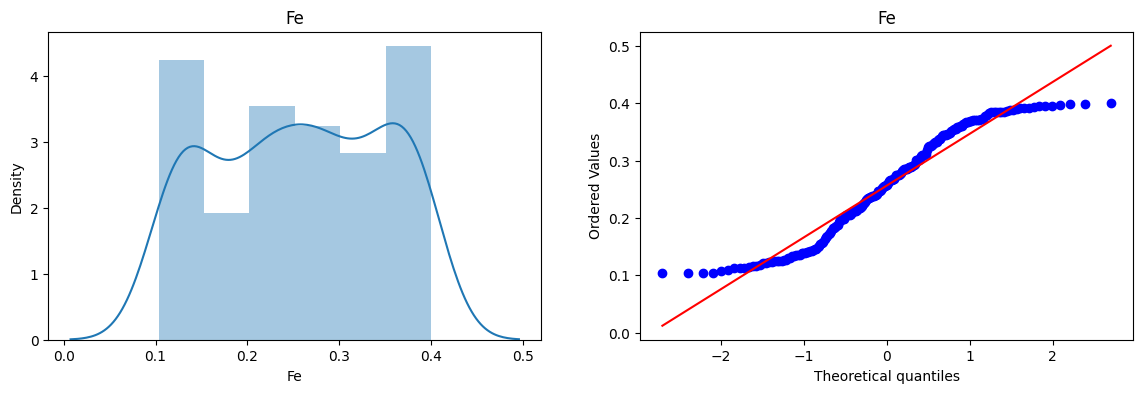

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


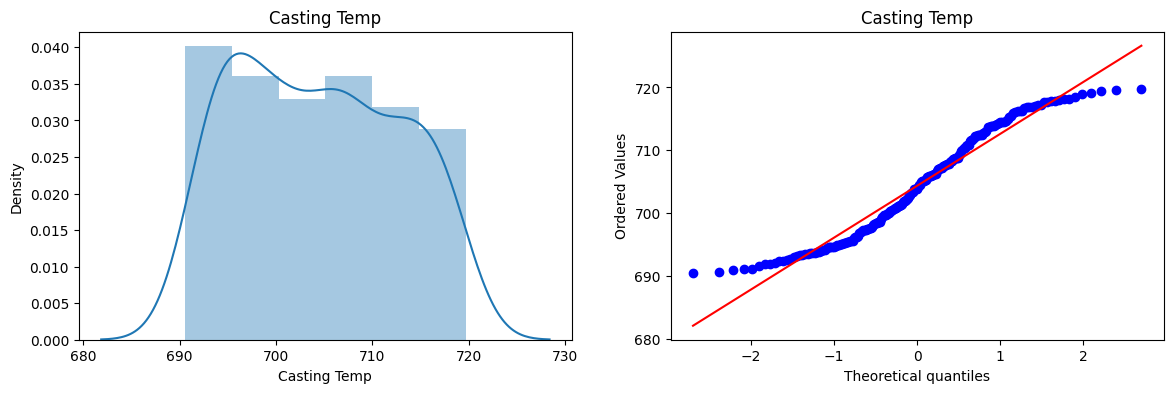

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


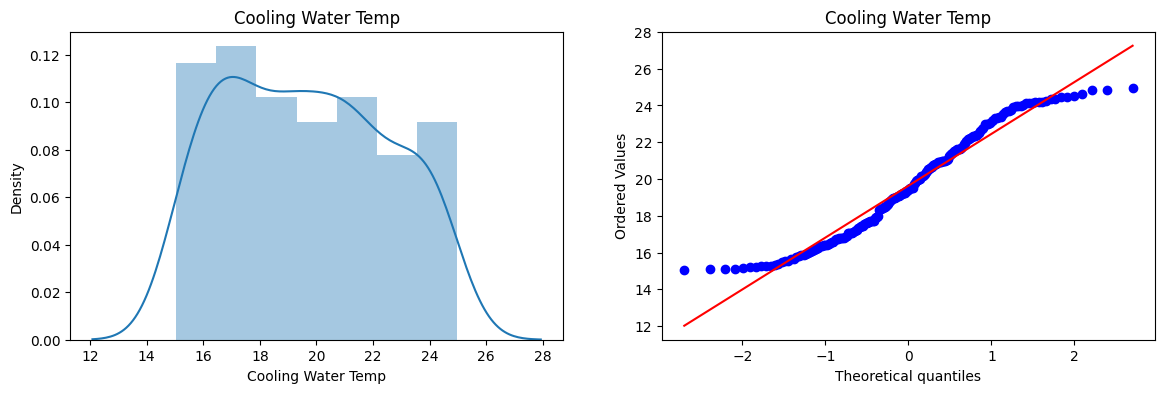

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


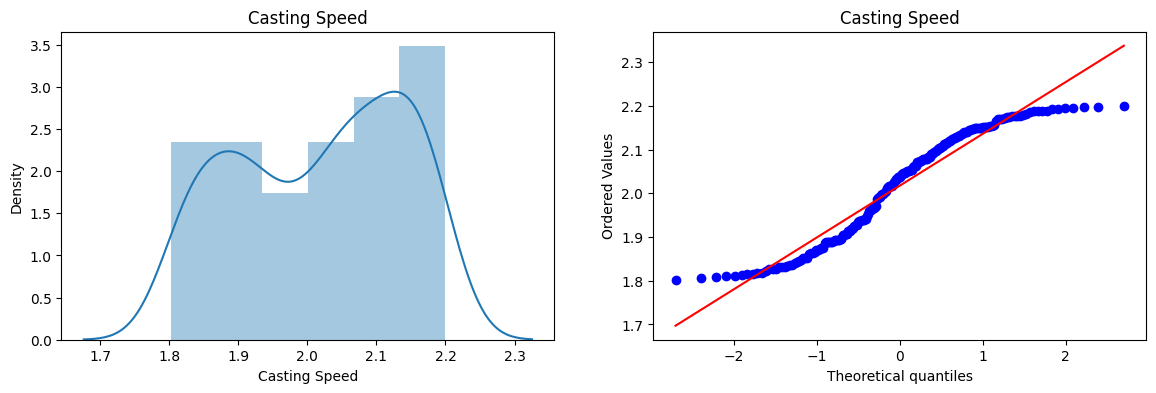

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


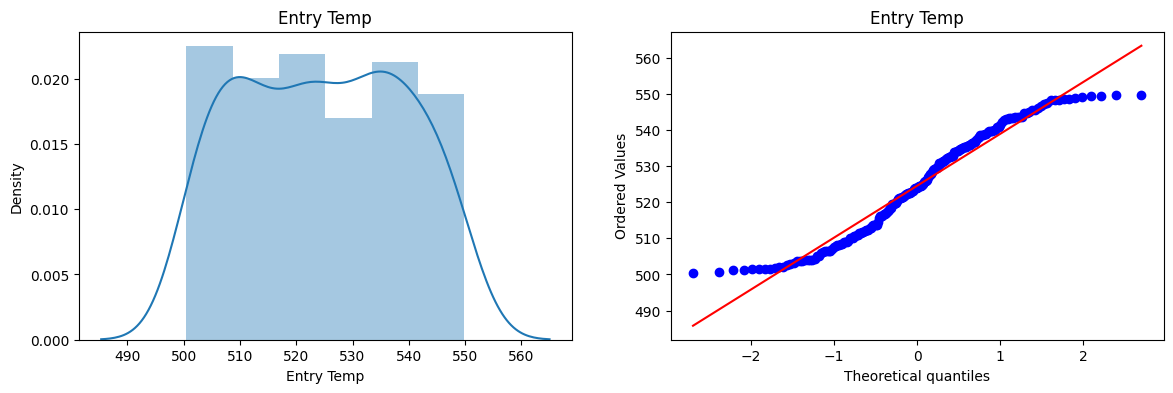

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


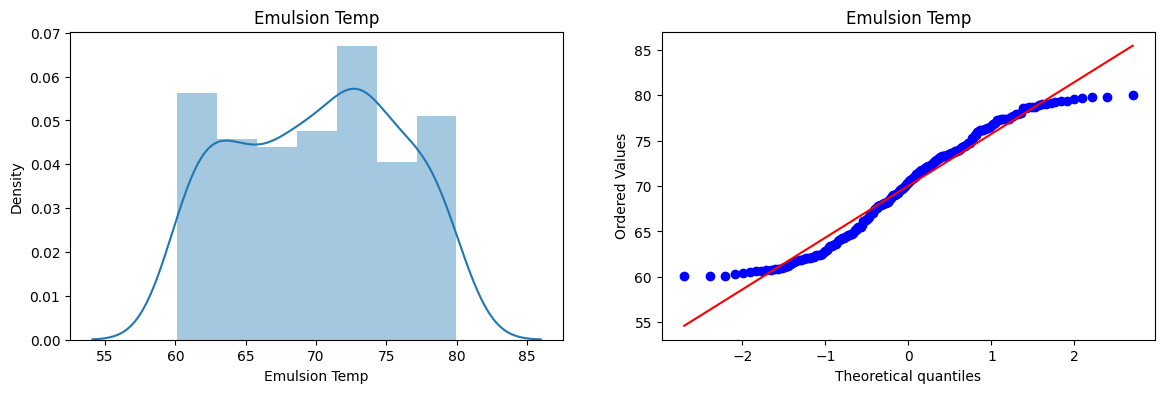

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


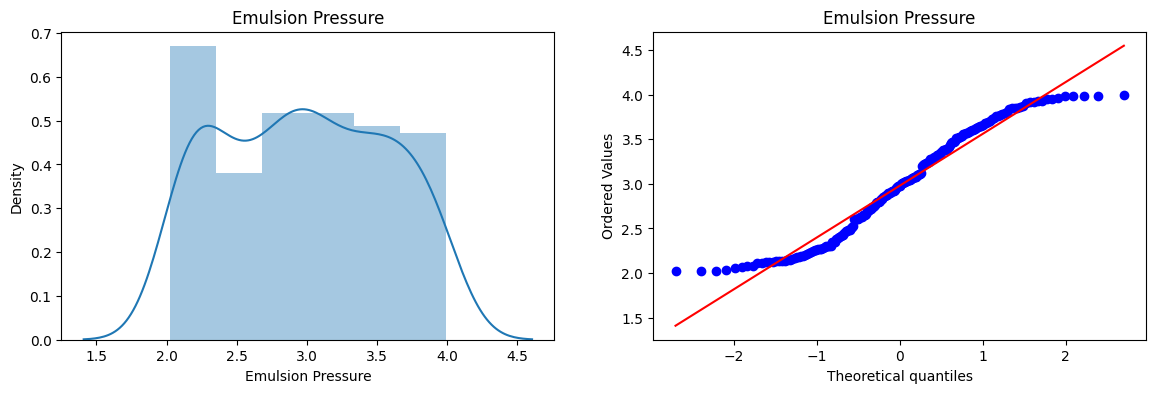

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1374736253.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])


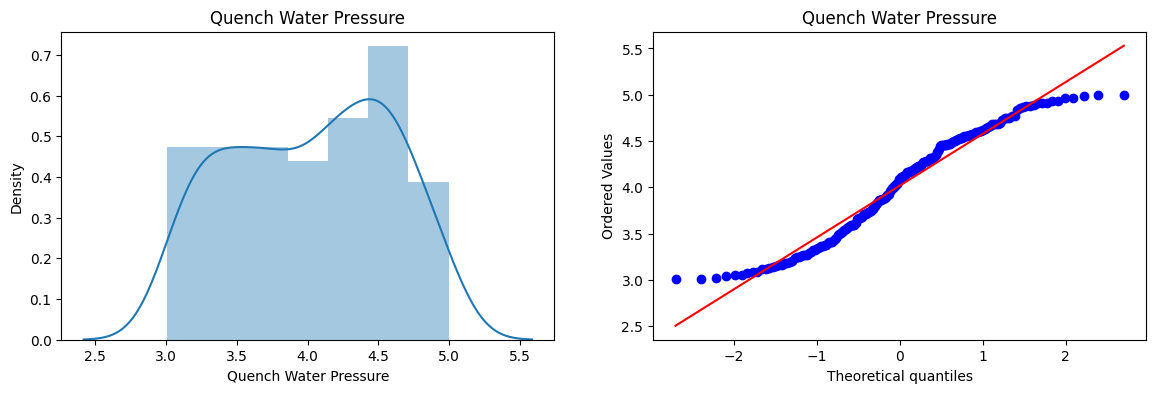

In [8]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

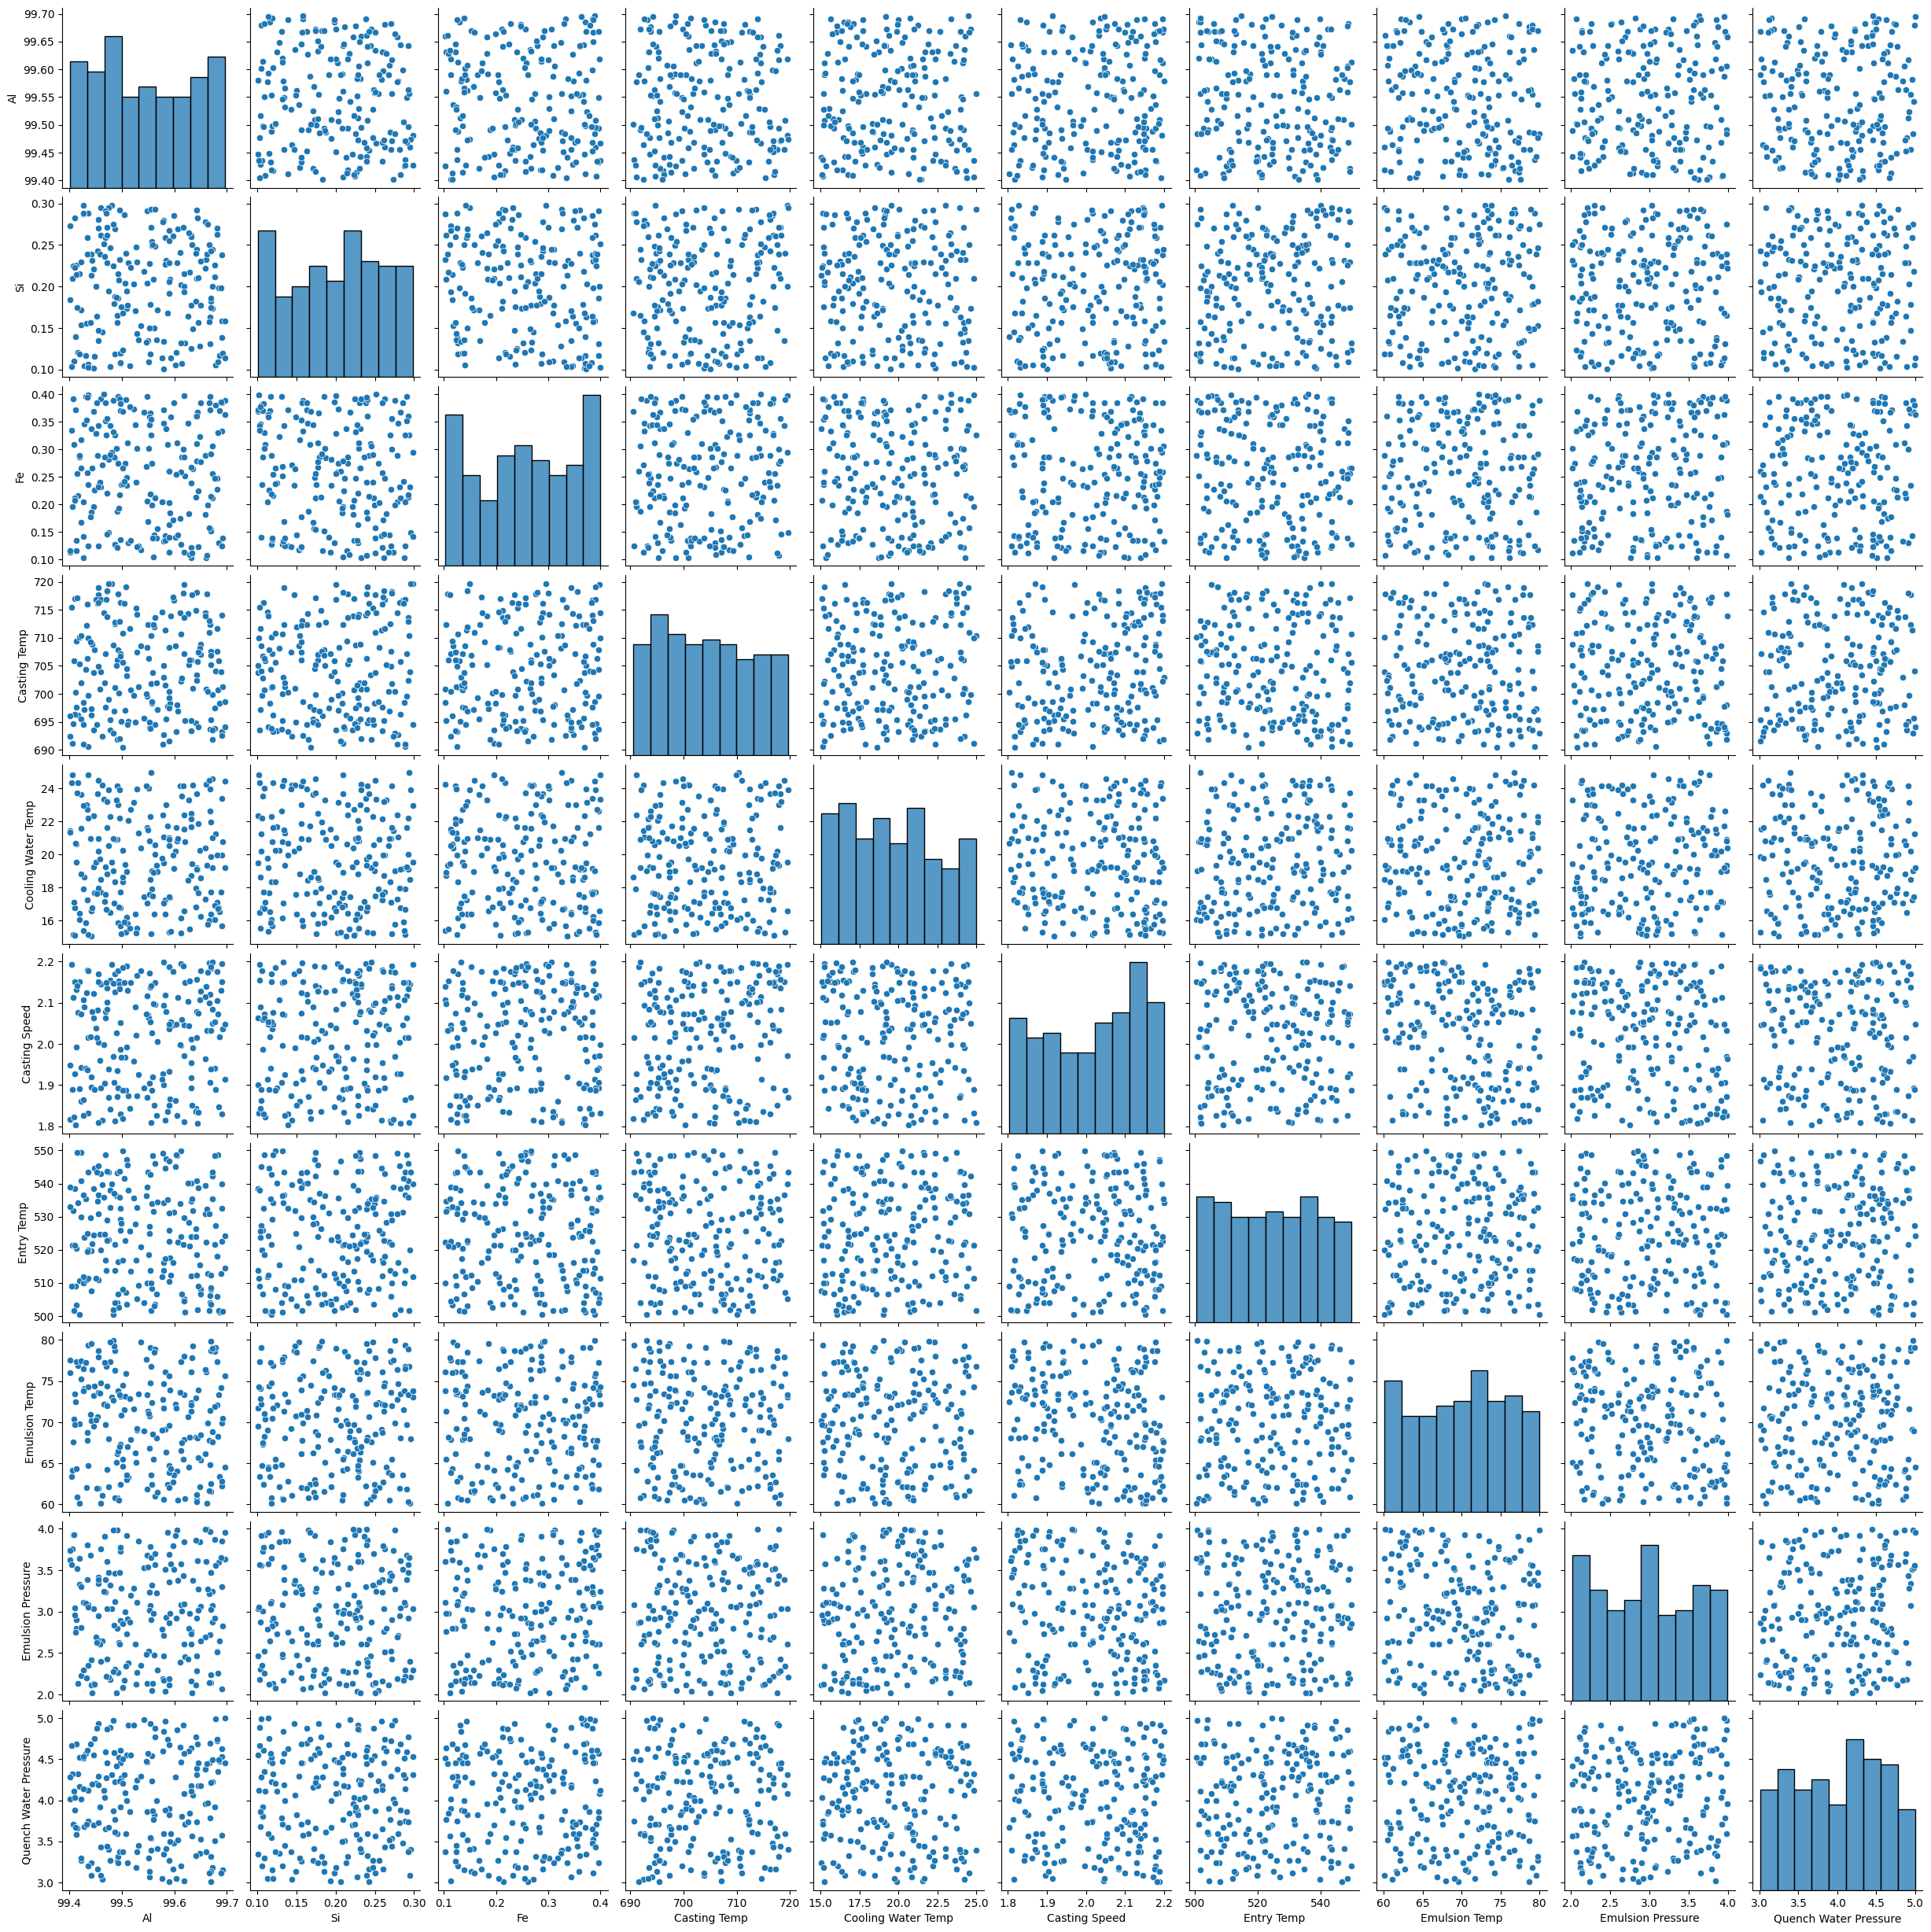

In [9]:
sns.pairplot(X)

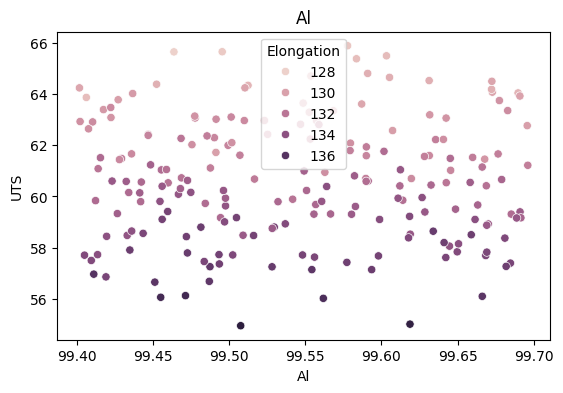

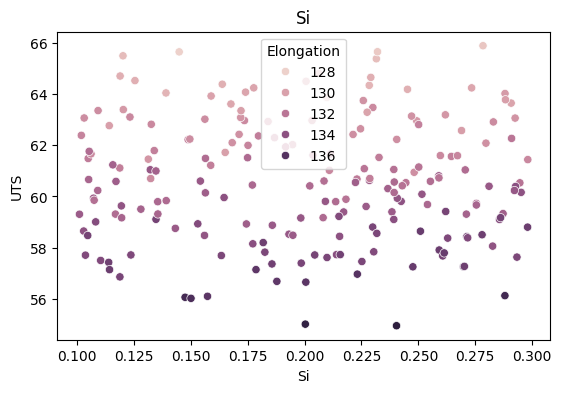

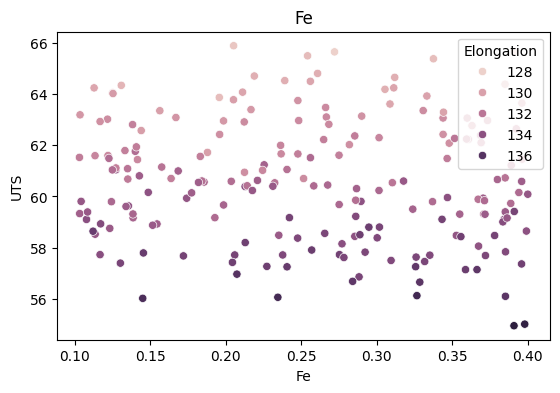

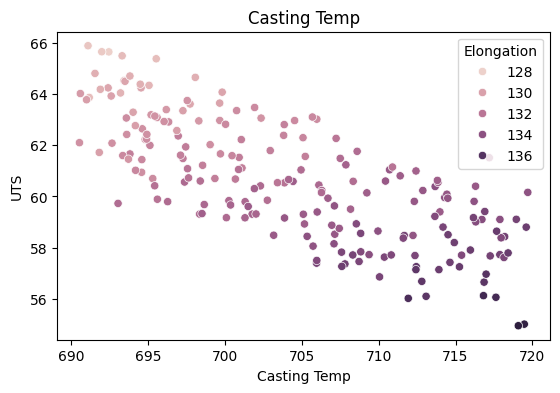

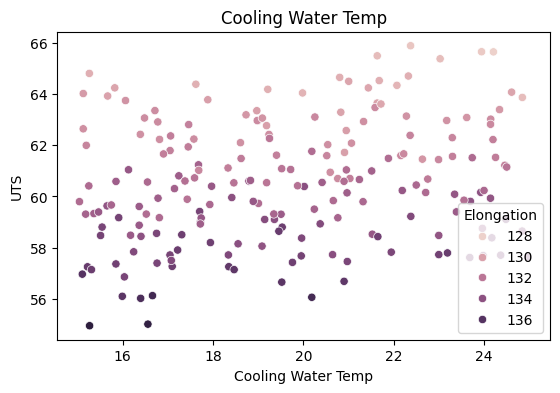

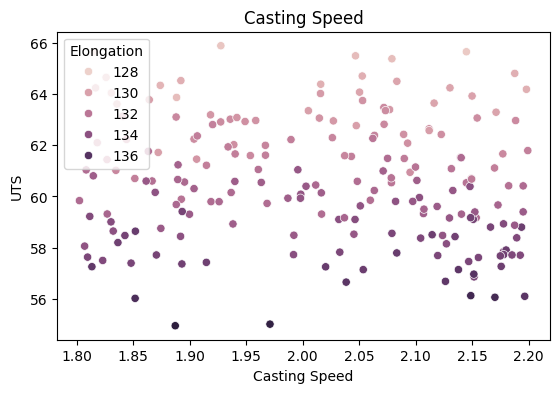

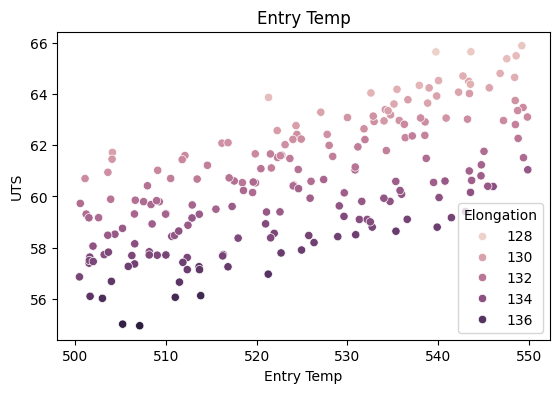

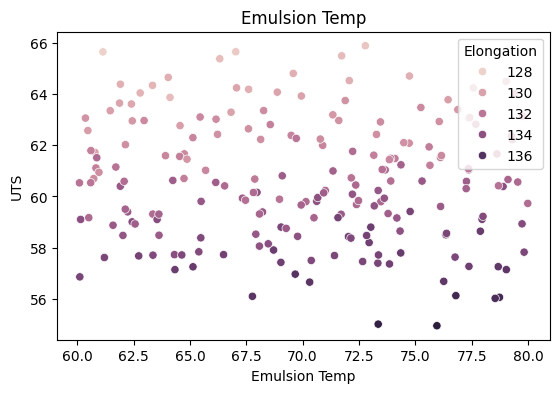

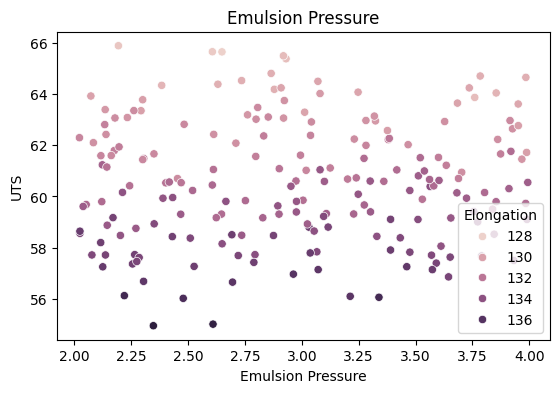

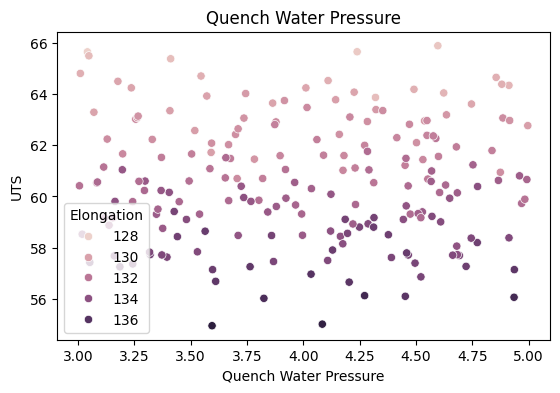

In [10]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.scatterplot(x=X[col],y=y_UTS,hue=y_Elongation)
    plt.title(col)

    
    plt.show()

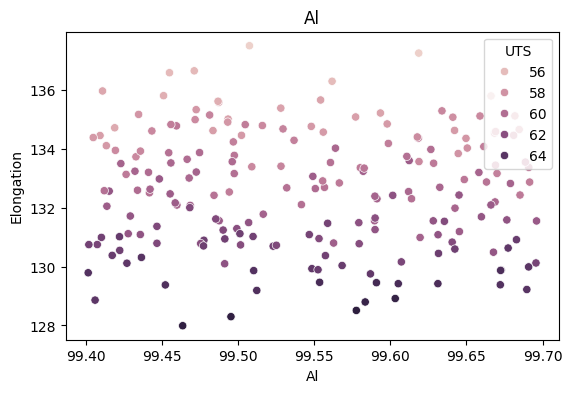

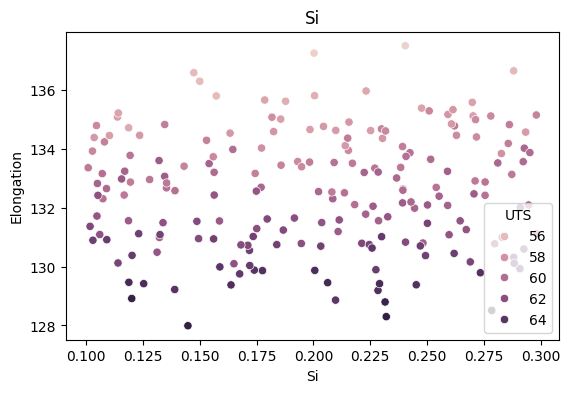

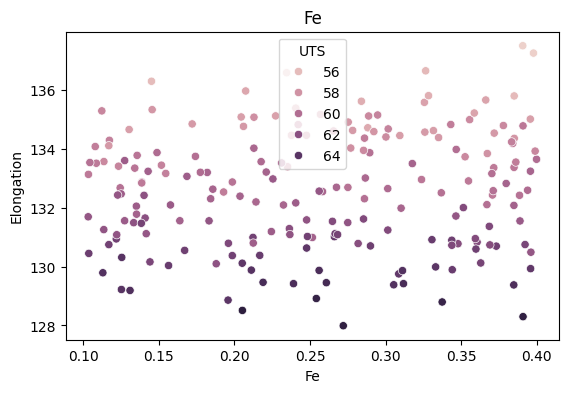

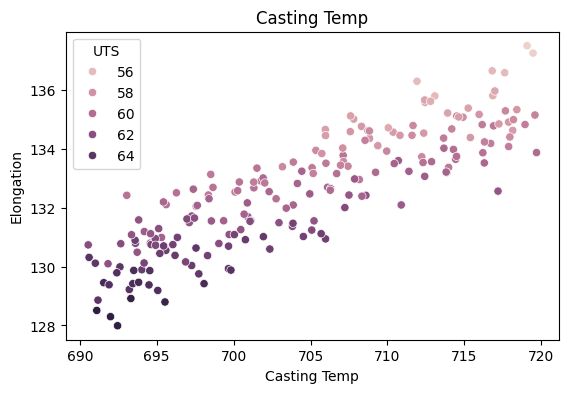

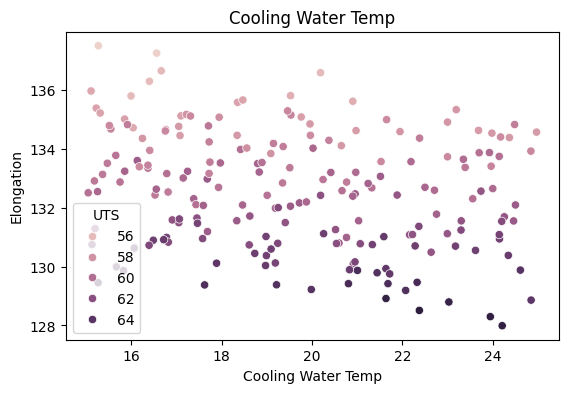

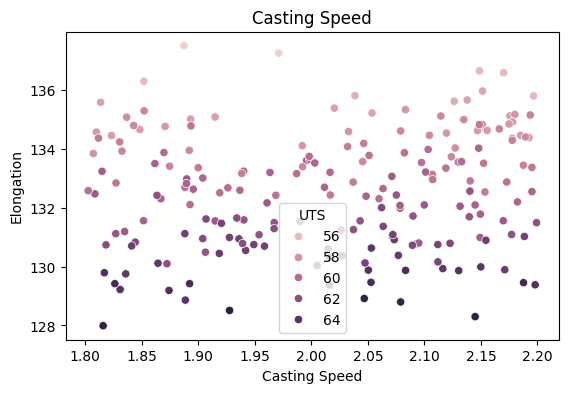

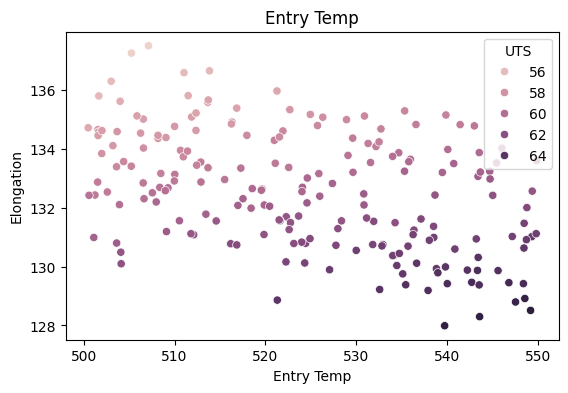

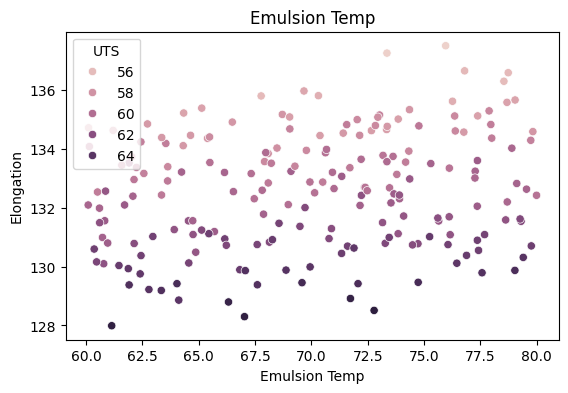

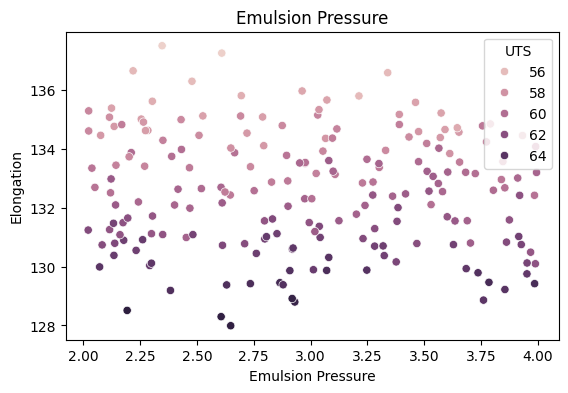

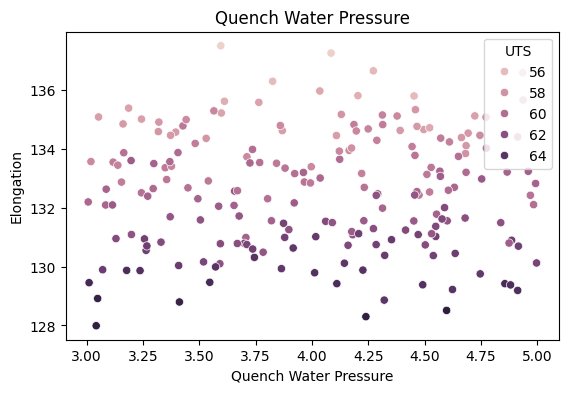

In [11]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.scatterplot(x=X[col],y=y_Elongation,hue=y_UTS)
    plt.title(col)

    
    plt.show()

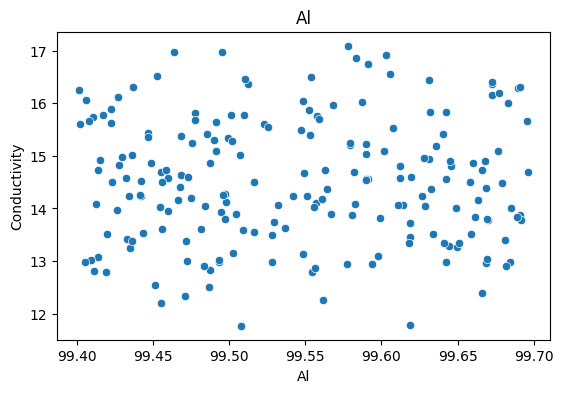

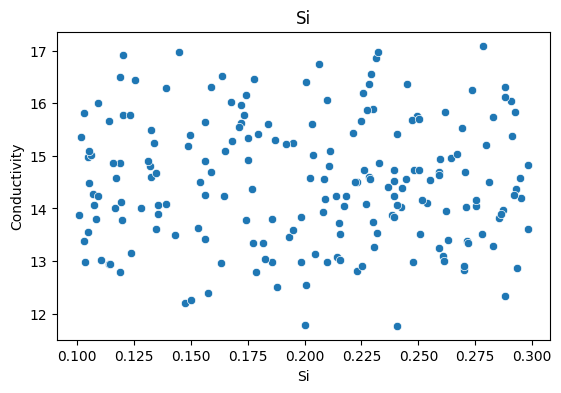

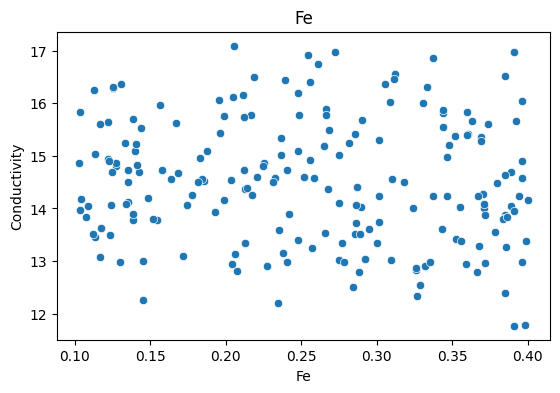

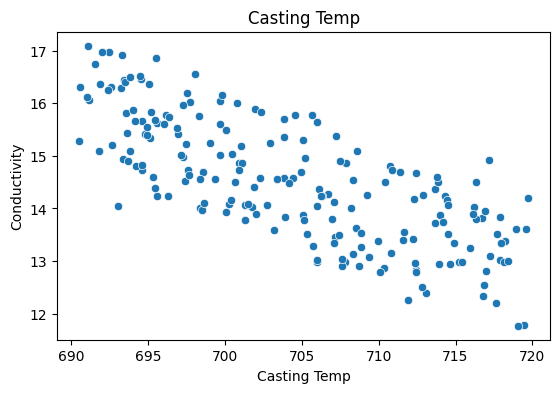

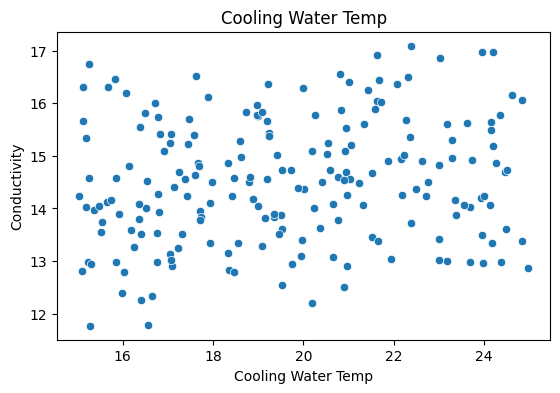

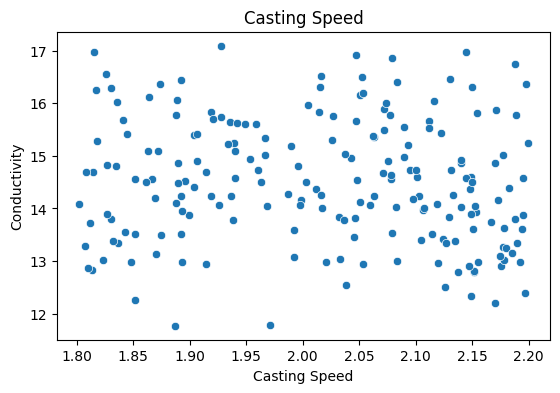

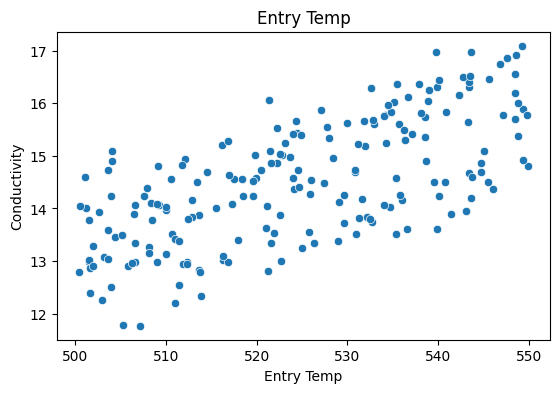

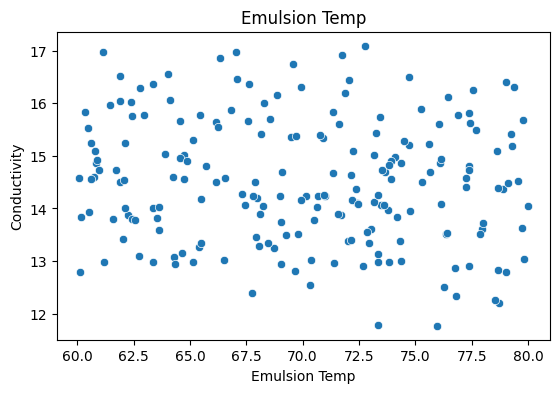

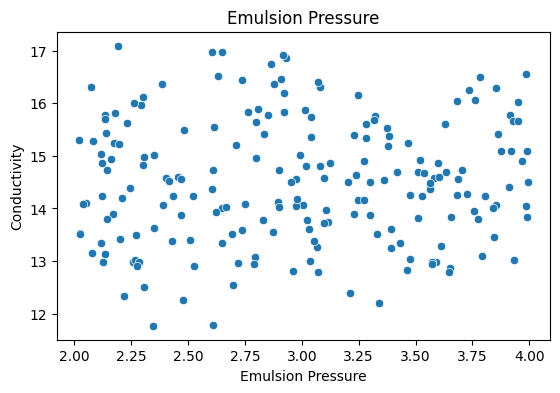

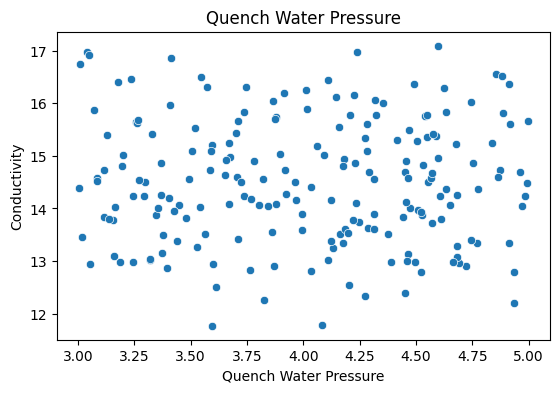

In [12]:
for col in X.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.scatterplot(x=X[col],y=y_Conductivity)
    plt.title(col)

    
    plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_new=ss.fit_transform(X)
X_new=pd.DataFrame(data=X_new,columns=X.columns)

In [14]:
X_new.head(5)

Al        Si        Fe  Casting Temp  Cooling Water Temp  \
0 -0.372140  0.470994 -1.362137     -1.113971            0.856519   
1  1.586615 -1.437843  1.245778     -0.719721           -1.092404   
2  0.843056 -1.172714 -0.050305     -1.084937            0.396428   
3  0.389770  1.348691  0.997537     -1.402435            0.503332   
4 -1.115023  0.349180 -0.654477     -1.287624           -0.138174   

   Casting Speed  Entry Temp  Emulsion Temp  Emulsion Pressure  \
0      -1.184865    0.917536      -1.163135          -1.013037   
1      -0.005786   -1.610140      -1.161126          -0.565476   
2       1.088281   -1.618627      -1.616621          -0.894636   
3       0.623214   -0.579939       0.817353          -0.457844   
4       0.868887   -0.011364       0.564827          -1.429760   

   Quench Water Pressure  
0               1.586209  
1               0.810756  
2              -0.549896  
3              -0.750727  
4              -0.562460

In [15]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X_new1=pt.fit_transform(X_new)
X_new1=pd.DataFrame(data=X_new,columns=X.columns)

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


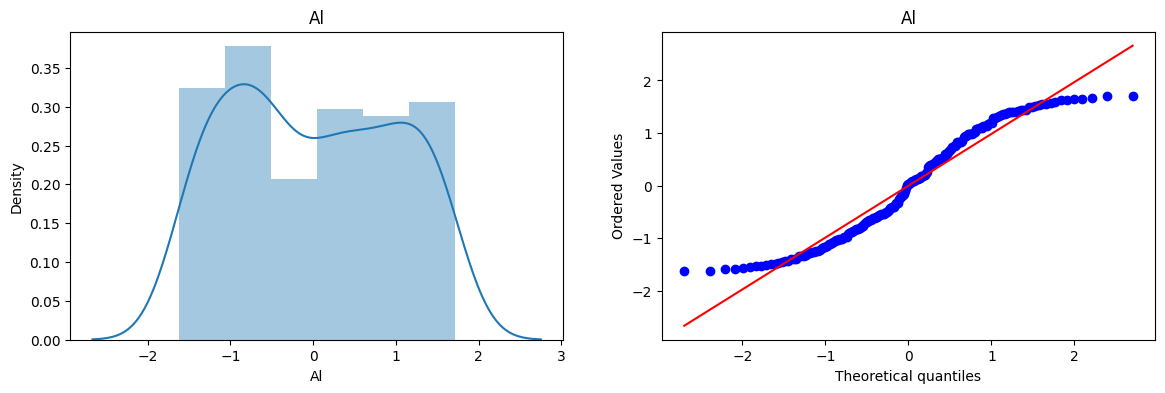

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


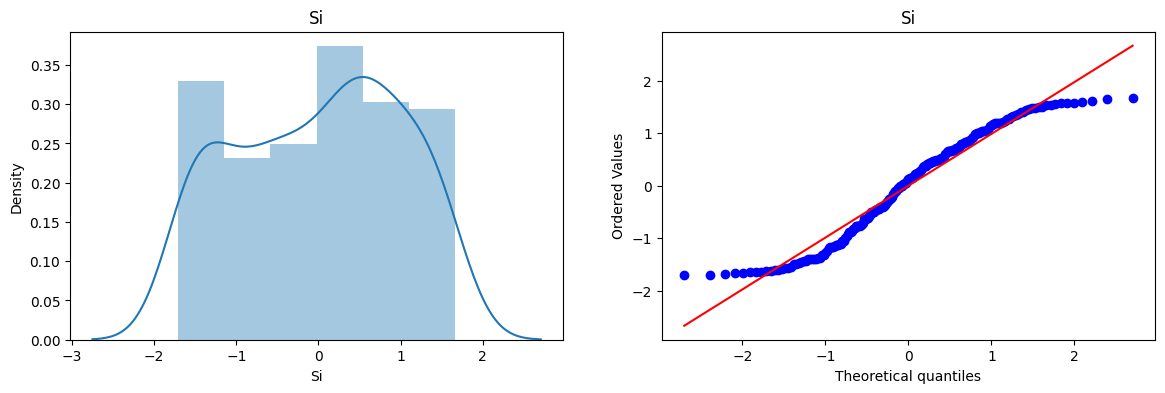

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


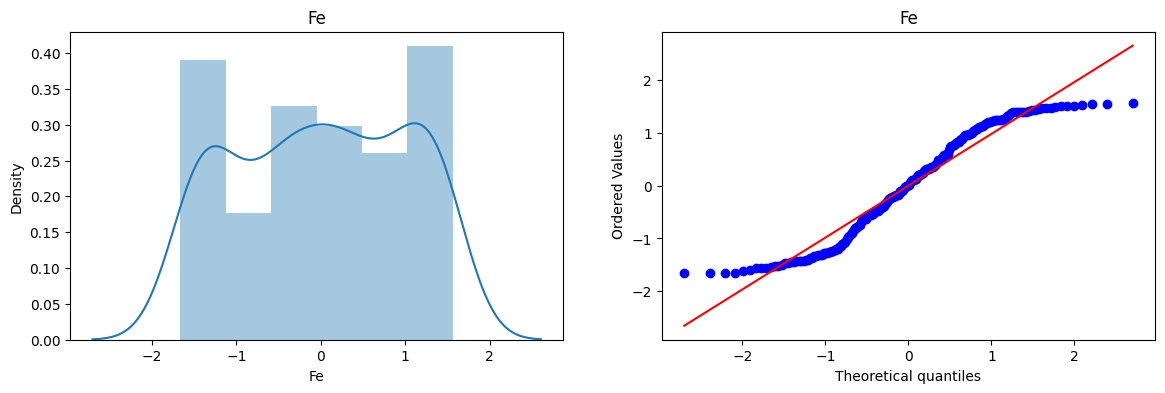

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


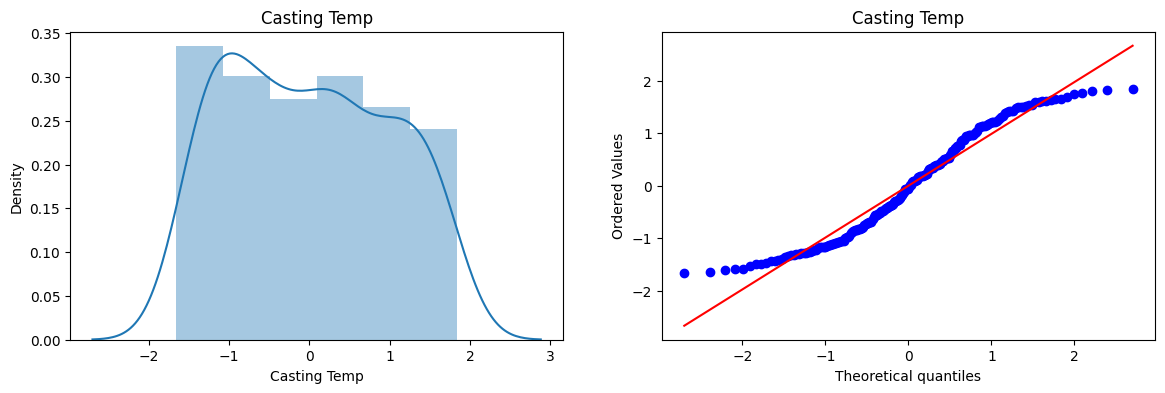

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


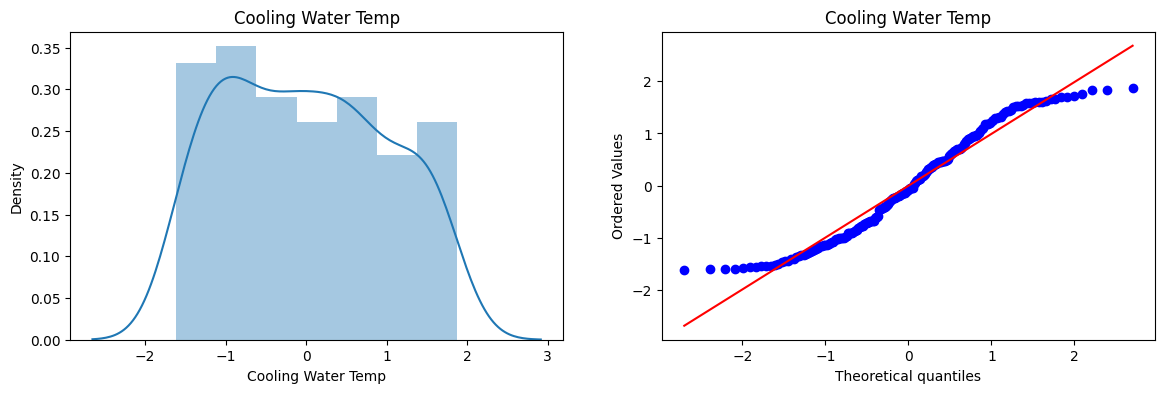

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


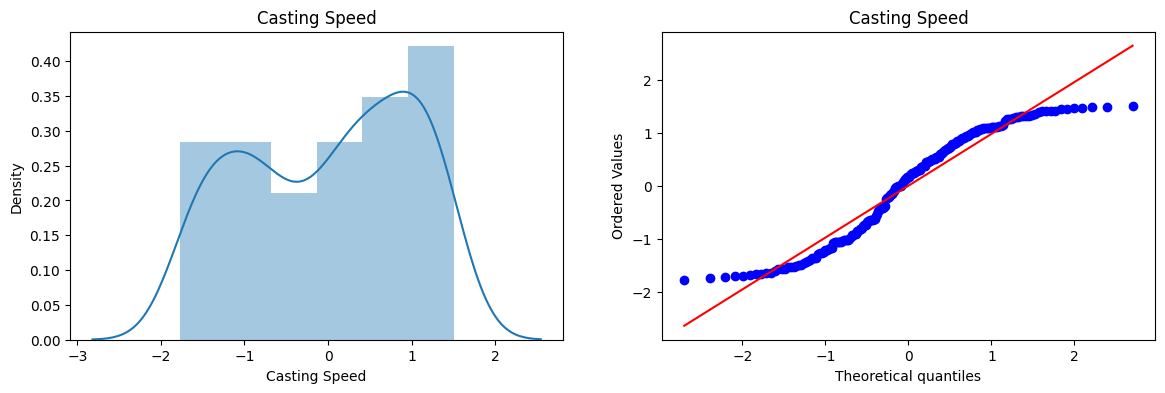

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


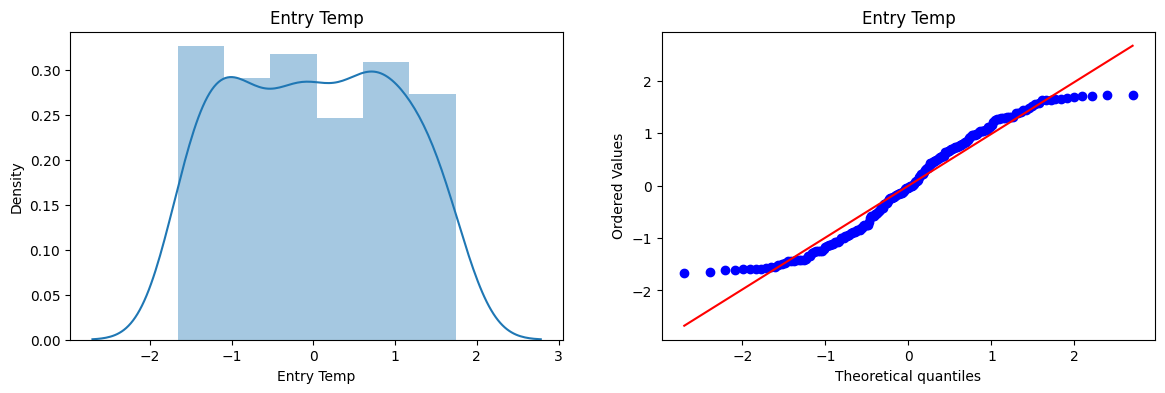

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


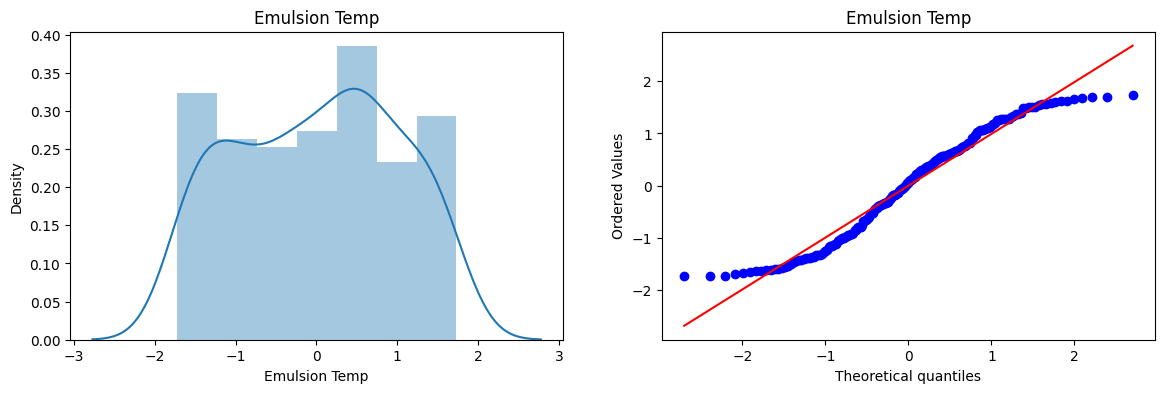

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


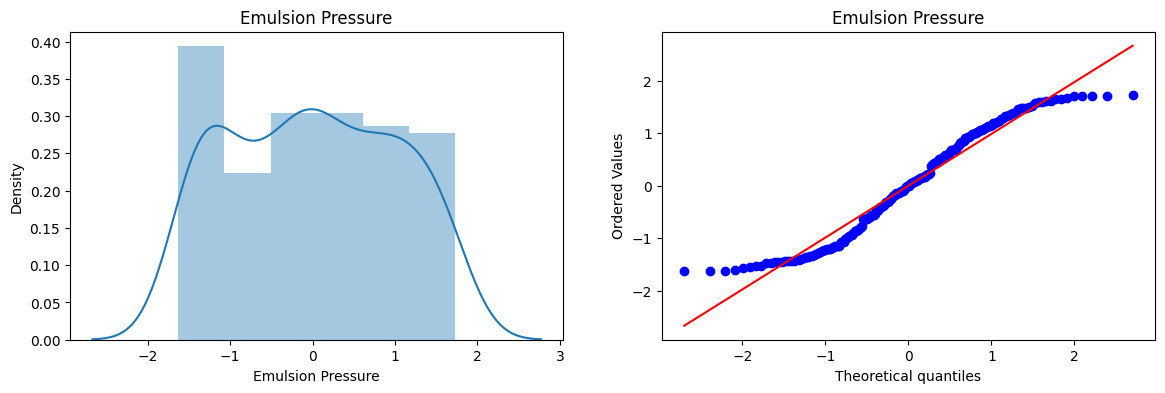

C:\Users\saurav banerjee\AppData\Local\Temp\ipykernel_5896\1153853709.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_new1[col])


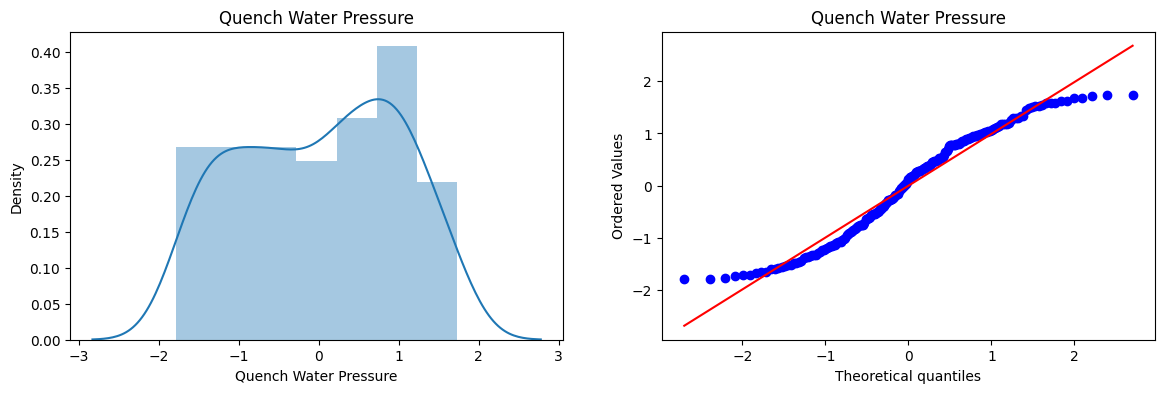

In [16]:
for col in X_new1.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_new1[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_new1[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [57]:

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=42)

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [54]:
X_train, X_test, y_UTS_train, y_UTS_test = train_test_split(X_new, y_UTS, test_size=0.2, random_state=42)
X_train, X_test, y_Elongation_train, y_Elongation_test = train_test_split(X_new, y_Elongation, test_size=0.2, random_state=42)
X_train, X_test, y_Conductivity_train, y_Conductivity_test = train_test_split(X_new, y_Conductivity, test_size=0.2, random_state=42)

In [55]:
print("UTS Result:-")
rf.fit(X_train, y_UTS_train)

# Make predictions
y_pred1 = rf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_UTS_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_UTS_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_UTS_test, y_pred)
print(f"R-squared (R²): {r2}")


print("Elongation Result:-")
rf.fit(X_train, y_Elongation_train)
y_pred2 = rf.predict(X_test) 

mse2 = mean_squared_error(y_Elongation_test, y_pred2)
print(f"Mean Squared Error: {mse2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Elongation_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Elongation_test, y_pred2)
print(f"R-squared (R²): {r2}")

print("Conductivity Result:-")
rf.fit(X_train, y_Conductivity_train)
y_pred3 = rf.predict(X_test) 

mse3 = mean_squared_error(y_Conductivity_test, y_pred3)
print(f"Mean Squared Error: {mse3}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Conductivity_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Conductivity_test, y_pred3)
print(f"R-squared (R²): {r2}")

UTS Result:-
Mean Squared Error: 0.637761619680032
Mean Absolute Error (MAE): 0.6053122532349526
R-squared (R²): 0.9075188581365907
Elongation Result:-
Mean Squared Error: 0.4953234600402495
Mean Absolute Error (MAE): 0.5159837260857258
R-squared (R²): 0.9019248459638661
Conductivity Result:-
Mean Squared Error: 0.13428751985403706
Mean Absolute Error (MAE): 0.27410813160168723
R-squared (R²): 0.91954962781865


In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
    
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

print("UTS Result grid_search_cv:-")
# Fit the grid search to the data
grid_search.fit(X_train, y_UTS_train)

# Print the best parameters and the best score

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_UTS_test)
print("Test Score:", test_score)

print("Elongation Result grid_search_cv:-")

grid_search.fit(X_train, y_Elongation_train)

# Print the best parameters and the best score

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_Elongation_test)
print("Test Score:", test_score)

print("Conductivity Result after grid_search_cv:-")

grid_search.fit(X_train, y_Conductivity_train)

# Print the best parameters and the best score

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_Conductivity_test)
print("Test Score:", test_score)

UTS Result grid_search_cv:-
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9118774620889987
Test Score: 0.9075188581365907
Elongation Result grid_search_cv:-
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8808675281446108
Test Score: 0.9047209156344443
Conductivity Result after grid_search_cv:-
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9229683543845801
Test Score: 0.9229115680744929


In [56]:
print("UTS Result:-")
model_UTS = LinearRegression().fit(X_train, y_UTS_train)
y_pred1 =model_UTS.predict(X_test)
mse1 = mean_squared_error(y_UTS_test, y_pred1)
print(f"Mean Squared Error: {mse1}")
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_UTS_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_UTS_test, y_pred1)
print(f"R-squared (R²): {r2}")


print("Elongation Result:-")
model_Elongation = LinearRegression().fit(X_train, y_Elongation_train)
y_pred2 =model_Elongation.predict(X_test)
mse2 = mean_squared_error(y_Elongation_test, y_pred2)
print(f"Mean Squared Error: {mse2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Elongation_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Elongation_test, y_pred2)
print(f"R-squared (R²): {r2}")

print("Conductivity Result:-")
model_Conductivity = LinearRegression().fit(X_train, y_Conductivity_train)
y_pred3 =model_Conductivity.predict(X_test)
mse3 = mean_squared_error(y_Conductivity_test, y_pred3)
print(f"Mean Squared Error: {mse3}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Conductivity_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Conductivity_test, y_pred3)
print(f"R-squared (R²): {r2}")


UTS Result:-
Mean Squared Error: 2.2592976325529776e-28
Mean Absolute Error (MAE): 1.2612133559741778e-14
R-squared (R²): 1.0
Elongation Result:-
Mean Squared Error: 5.048709793414476e-28
Mean Absolute Error (MAE): 1.4921397450962105e-14
R-squared (R²): 1.0
Conductivity Result:-
Mean Squared Error: 2.1614788803055722e-29
Mean Absolute Error (MAE): 3.641531520770513e-15
R-squared (R²): 1.0


In [52]:
dt.fit(X_train, y_UTS_train)
y_pred1 = dt.predict(X_test)

print("UTS Result ")

# Evaluate the model's performance
mse = mean_squared_error(y_UTS_test, y_pred1)
print(f"Mean Squared Error: {mse}")
# Mean absolute_error
mae = mean_absolute_error(y_UTS_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate R-squared (R²) score
r2 = r2_score(y_UTS_test, y_pred1)
print(f"R-squared (R²): {r2}")

print("Elongation Result")
dt.fit(X_train, y_Elongation_train)
y_pred2 = dt.predict(X_test) 

mse2 = mean_squared_error(y_Elongation_test, y_pred2)
print(f"Mean Squared Error: {mse2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Elongation_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Elongation_test, y_pred2)
print(f"R-squared (R²): {r2}")

print("Conductivity Result")

dt.fit(X_train, y_Conductivity_train)
y_pred3 = dt.predict(X_test) 
mse3 = mean_squared_error(y_Conductivity_test, y_pred3)
print(f"Mean Squared Error: {mse3}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Conductivity_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Conductivity_test, y_pred3)
print(f"R-squared (R²): {r2}")

UTS Result 
Mean Squared Error: 0.8390076719403897
Mean Absolute Error (MAE): 0.7734875857330143
R-squared (R²): 0.8783363797085557
Elongation Result
Mean Squared Error: 1.016248207172611
Mean Absolute Error (MAE): 0.8238335094690463
R-squared (R²): 0.7987805797664022
Conductivity Result
Mean Squared Error: 0.15994653801596695
Mean Absolute Error (MAE): 0.3333613388604066
R-squared (R²): 0.9041775547981711


In [53]:
import xgboost as xgb

print("UTS Result:-")
train_dmatrix = xgb.DMatrix(data=X_train, label=y_Elongation_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_Elongation_test)
params = {
    "objective": "reg:squarederror",  # Regression task with squared error
    "max_depth": 3,                   # Maximum depth of a tree
    "learning_rate": 0.1,             # Step size shrinkage
    "n_estimators": 100               # Number of boosting rounds
}

bst = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions on the test set
y_pred1 = bst.predict(test_dmatrix)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_Elongation_test, y_pred1)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Elongation_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Elongation_test, y_pred2)
print(f"R-squared (R²): {r2}")


print("UTS Result:-")
train_dmatrix = xgb.DMatrix(data=X_train, label=y_UTS_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_UTS_test)
params = {
    "objective": "reg:squarederror",  # Regression task with squared error
    "max_depth": 3,                   # Maximum depth of a tree
    "learning_rate": 0.1,             # Step size shrinkage
    "n_estimators": 100               # Number of boosting rounds
}

bst = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions on the test set
y_pred2 = bst.predict(test_dmatrix)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_UTS_test, y_pred2)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_UTS_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_UTS_test, y_pred1)
print(f"R-squared (R²): {r2}")


print("Conductivity Result:-")

train_dmatrix = xgb.DMatrix(data=X_train, label=y_Conductivity_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_Conductivity_test)
params = {
    "objective": "reg:squarederror",  # Regression task with squared error
    "max_depth": 3,                   # Maximum depth of a tree
    "learning_rate": 0.1,             # Step size shrinkage
    "n_estimators": 100               # Number of boosting rounds
}

bst = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions on the test set
y_pred3 = bst.predict(test_dmatrix)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_Conductivity_test, y_pred3)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_Conductivity_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²) score
r2 = r2_score(y_Conductivity_test, y_pred3)
print(f"R-squared (R²): {r2}")




UTS Result:-
Mean Squared Error: 0.24
Mean Absolute Error (MAE): 0.8238335094690463
R-squared (R²): 0.7987805797664022
UTS Result:-
Mean Squared Error: 0.35
Mean Absolute Error (MAE): 72.48218849393409
R-squared (R²): -763.7782941084869
Conductivity Result:-
Mean Squared Error: 0.08
Mean Absolute Error (MAE): 0.1975171768772574
R-squared (R²): 0.9530372039079293


c:\Users\saurav banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\saurav banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\saurav banerjee\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:57:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_es

In [58]:
xgb_model = xgb.XGBRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [1, 0.1, 10]  # L2 regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=1)

# Fit the model using grid search
grid_search.fit(X_train, y_UTS_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best negative MSE: ", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print the test MSE
mse = mean_squared_error(y_UTS_test, y_pred)
print(f"Test Mean Squared Error: {mse:.4f}")

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best negative MSE:  -0.15280585801037755
Test Mean Squared Error: 0.2917
